In [20]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML, IFrame
from ipywidgets import interact,fixed
import pandas as pd
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import axes3d
from matplotlib.patches import FancyArrowPatch,Rectangle,Circle
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from mpl_toolkits.mplot3d import proj3d

plt.rcParams["figure.figsize"] = [8,8]

from numpy.linalg import norm
from numpy import cos,sin,tan,arctan,exp,log,pi,sqrt,linspace,meshgrid,arange,array

from scipy.integrate import quad,dblquad

$\newcommand{\RR}{\mathbb{R}}$
$\newcommand{\bv}[1]{\begin{bmatrix} #1 \end{bmatrix}}$
$\renewcommand{\vec}{\mathbf}$


# One-minute Review

Compute the following line integral 
 $$\int_C (x-y)\,dx + xy\,dy$$ where $C$ is the clockwise section of the circle $x^2 + y^2 = 1$ from $(1,0)$ to $(0,1)$. 

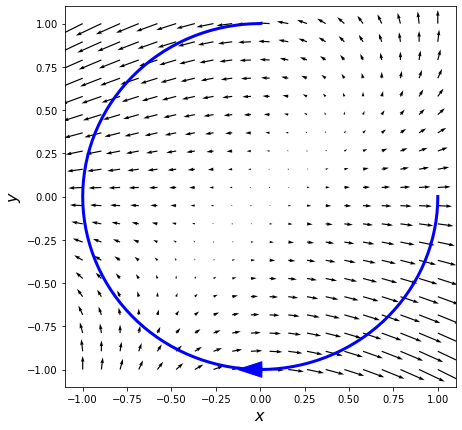

In [21]:
x = y = np.linspace(-1,1,20)
x,y = np.meshgrid(x,y)
plt.figure(figsize=(7,7))
plt.quiver(x,y,x-y,x*y);
for c in 'xy':
#         getattr(ax,f"set_{c}lim")([-1,1]);    
    getattr(plt.gca(),f"set_{c}label")(f"${c}$",size=16)
t= np.linspace(0,1,100)    
# plt.plot(2 - (2+sqrt(2))*t,sqrt(2)*t,'r',lw=3);
plt.arrow(0.01,-1,-.001,0,width=.03,color='b')
plt.plot(cos(t*3*pi/2),-sin(t*3*pi/2),'b',lw=3);

$\vec r(t) = \langle \cos(t), -\sin(t) \rangle $ for $ 0 \leq t \leq 3\pi/2$.

$$\int_0^{3\pi/2} (\cos t + \sin t)(-\sin t) + (\cos t)(-\sin t)(- \cos t )dt  $$

In [22]:
quad(lambda t: (cos(t) + sin(t))*(-sin(t)) + cos(t)*(-sin(t))*(-cos(t)),0,3*pi/2)[0]

-2.5228611568590114

## Work example

A wagon 5 m away is pulled by a rope from a height 1 m above it with a force of 7 N. How much work is done pulling it the full distance?
<!--![Picture of wagon pulled by rope](wagon.png) -->

In [23]:
@interact(xpos=(0.,5.))
def _(xpos=0):
    fig = plt.figure(figsize = (7.5,3))
    ax = fig.gca()
    ax.plot([0+xpos,5],[0,1],'k')
    ax.add_patch(Rectangle([-2+xpos,-1/4],2,1/2,color='r',alpha=.3))
    for xx in (-5/3,-1/3):
        ax.add_patch(Circle([xx+xpos,-1/4],1/4,color='k',alpha=1))
    ax.set_ylim([-1,2])
    ax.set_xlim([-2.5,5])
    ax.arrow(xpos,0,(5-xpos)/norm((5-xpos,1)),1/norm((5-xpos,1)),color='b',width=.03);
    for xi in np.arange(0,xpos,1/2):
        ax.arrow(xi,0,(5-xi)/norm((5-xi,1)),1/norm((5-xi,1)),color='b',width=.03,alpha=.5);

interactive(children=(FloatSlider(value=0.0, description='xpos', max=5.0), Output()), _dom_classes=('widget-in…

The scenario is modeled above with a path of $\vec r(t) = \langle t,0 \rangle$ for the wagon and the position of the puller at $\langle 5,1\rangle$ (we took a slightly different, but equivalent model in class). The force is thus _the vector from the position $\langle x,y \rangle$ to $\langle 5,1 \rangle$ with magnitude 7_.

$$\vec F(x,y) = 7\frac{\langle 5-x,1-y \rangle}{\sqrt{(5-x)^2 +(1-y)^2}} $$

$$W = \int_C \vec F\cdot d\vec r = \int_0^{5}\vec F(\vec r(t))\cdot \vec r'(t)\,dt $$

$$ = \int_0^5 \frac{7(5-t)}{\sqrt{(5-t)^2 + 1}}dt = 7(\sqrt{26} - 1)$$

In [24]:
quad(lambda t: 7*(5-t)/sqrt((5-t)**2 + 1),0,5)[0]

28.69313659514949

In [25]:
7*sqrt(26) - 7

28.69313659514949

$\int_C \vec i\cdot d\vec r = \int_C dx$ by definition, but notice this is exactly the total change in the $x$-coordinate of $C$, which is $2\pi$ in this case.

# The Fundamental Theorem of Line integrals

Let $C$ be a piecewise-smooth, oriented curve from point $(x_1,y_1)$ to point $(x_2,y_2)$ and $\vec F$ a continuous conservative vector field with potential $f$. (That is, $\nabla f = \vec F$.)  Then, $$\int_C \vec F\cdot d\vec r = f(x_2,y_2) - f(x_1,y_1).$$

In [27]:
@interact
def _(s = (0,1,.05),r = fixed(lambda t: np.array([(1+t/4)*cos(4*pi*t),2*t - sin(8*t)/2]))):
    t = np.linspace(0,1,100)
    plt.plot(*r(t),'-r')
    plt.text(-.7,.45,"$C$",fontsize=30,color='r');
    u = np.linspace(-1.2,1.3,18) 
    v = np.linspace(-1,2,18)
    x,y = np.meshgrid(u,v)
    plt.quiver(x,y,2*x,y/2,alpha = (1 - .8*s));
    u = np.linspace(-1.2,1.3,55) 
    v = np.linspace(-1,2,55)
    x,y = np.meshgrid(u,v)
    plt.contour(x,y,x**2 + y**2/4,alpha=s,levels=arange(.25,3,3/8))


interactive(children=(FloatSlider(value=0.0, description='s', max=1.0, step=0.05), Output()), _dom_classes=('w…

<p style="padding-bottom:40%;"> </p>

## Example

Compute $\int_C \vec F\cdot d\vec r$ where $C$ is the curve $\vec r(t) = \langle (1+t/4)\cos(4\pi t),2t - \frac12\sin(8 t) \rangle$ for $t\in [0,1]$ and $$\vec F(x,y) = \left\langle 2x,\frac{y}{2} \right\rangle.$$

In [28]:
r = lambda t: np.array([(1+t/4)*cos(4*pi*t),2*t - sin(8*t)/2])
f = lambda x,y: x**2 + y**2/4
t = np.linspace(0,1,100)

@interact(angle=(-108,66,6),s=(0.,1,.05),)
def _(angle=-24,vangle=(0,90,6),s=0,
     r=fixed(lambda t: np.array([(1+t/4)*cos(4*pi*t),2*t - sin(8*t)/2])),
     r2=fixed(lambda t: np.array([(1-t)+5/4 * t,(t)*(2 - sin(8)/2)])),
     f=fixed(lambda x,y: x**2 + y**2/4),
     t=fixed(np.linspace(0,1,100))):
    fig = plt.figure(figsize=(12,6))
    ax= fig.add_subplot(121,projection='3d')
    u = np.linspace(-1.2,1.25,100) 
    v = np.linspace(-1,2,100) 
    w = np.linspace(0,1,77)
    w,z = np.meshgrid(w,np.linspace(0,1,50))
    U,V = np.meshgrid(u,v)
    ax.plot_surface(U,V,f(U,V),alpha=.4)
    A = np.array([1,0])
    B = np.array([5/4,2-sin(8)])
    ax.plot_surface(*((1-s)*r(w) + s*r2(w)),z*f(*((1-s)*r(w) + s*r2(w))),color='r')
    ax.plot(*r(t),np.zeros_like(t),'-r')
    ax.view_init(vangle,angle)


    for c in 'xyz':
#         getattr(ax,f"set_{c}lim")([-1,1]);    
        getattr(ax,f"set_{c}label")(f"${c}$",size=16)
    
    ax2= fig.add_subplot(122)

    ax2.plot(*r(t),'-r',alpha=.4)
    ax2.plot(*((1-s)*r(t) + s*r2(t)),'-r')
    ax2.text(-.7,.45,"$C$");
    u = np.linspace(-1.2,1.2,18) 
    v = np.linspace(-1,2,18)
    x,y = np.meshgrid(u,v)
    plt.quiver(x,y,2*x,y/2);

interactive(children=(IntSlider(value=-24, description='angle', max=66, min=-108, step=6), IntSlider(value=42,…

$$f(x,y) = x^2 + y^2/4$$

is the potential; i.e., $\nabla f = \vec F$.

$$\int_C \vec F\cdot d\vec r = f(\vec r(1)) - f(\vec r(0)) = f(5/4,2 - \sin(8)/2) - f(1,0)$$

In [29]:
f = lambda x,y: x**2 + y**2/4
f(5/4,2 - sin(8)/2) - f(1,0)

1.128997735448415

<p style="padding-bottom:40%;"> </p>

## Theorem

The following statements are equivalent regarding a continuous vector field $\vec F$.

  - $\vec F$ is conservative.
  - $\oint_C \vec F\cdot d\vec r = 0$ on every closed curve $C$.
  - $\int_C \vec F\cdot d\vec r$ depends only on the endpoints of $C$, i.e., is path-independent.

### Example

Recall that for a vector field of the form $\vec F(x,y) = \langle P(x,y),Q(x,y) \rangle$, we have

$$\int_C\vec F\cdot d\vec r = \int_C P\,dx + Q\,dy.$$

For each line integral below, identify the vector field associated with it and determine if it is conservative. 

  - $\displaystyle \int_C x^2\, dx - y\,dy$
  
  Conservative. $f(x,y) = x^3/3 - y^2/2$.
  
  - $\displaystyle \int_C dx - dy$
  
    Conservative. $f(x,y) = x - y$.

  - $\displaystyle \int_C x^2\, dy - y\,dx$
  
    Not conservative. $P_y = -1 \neq Q_x = 2x$. **Be careful with the order here.**

  - $\displaystyle \int_C f(x)\, dx +g(y)\,dy$
  
    Conservative. Potential is $p(x,y) = F(x) + G(y)$ where $F$ and $G$ are any antiderivatives of $f$ and $g$, respectively.



<p style="padding-bottom:40%;"> </p>

### Examples

  1. Compute $\int_C x\,dx + y\,dy$ where $C$ is:
    1. the parabola $y = \frac49 x^2$ from $(0,0)$ to $(3,4)$.
    2. any circle.

  2. A 160-lb man carries a 25-lb can of paint up a helical staircase that encircles a silo with a radius of 20-ft. If the silo is 90 ft high and the man makes exactly three complete revolutions climbing to the top, how much work is done by the man against gravity? 

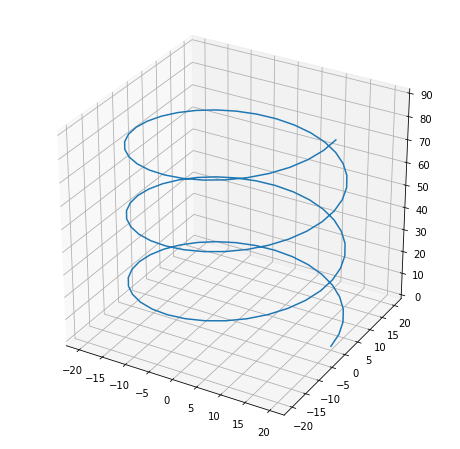

In [30]:
fig = plt.figure(figsize=(8,8))
ax = fig.gca(projection='3d')
t = linspace(0,6*pi,100)
ax.plot(20*cos(t),20*sin(t),90/(6*pi)*t);

$$W = \int_C 185\, dz$$

In [31]:
90*185

16650

  3. Suppose there is a hole in the can of paint in the exercise above and 9 lbs of paint leaks steadily out of the can during the man's ascent. How much work is done?	 
 

$$W = \int_C (185 - \frac{9}{90}z)dz$$

In [32]:
185*90 - 1/20*(90)**2

16245.0

<p style="padding-bottom:40%;"> </p>

  4. Compute the line integral $$\int_C (x^2 - xy)\,dx + (y-2)\,dy$$ where $C$ is the polygonal path from $(2,0)$ to $(0,0)$ to $(2,1)$ to $(0,1)$.

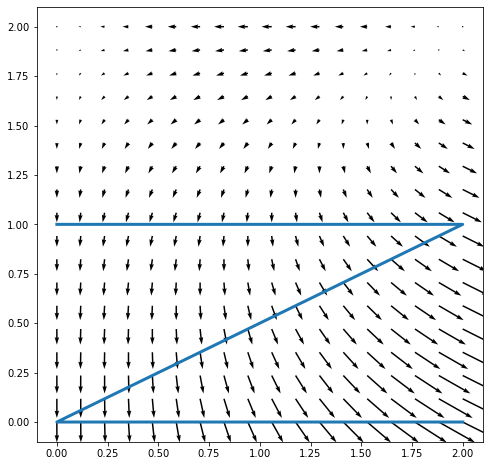

In [33]:
x =y = linspace(0,2,18)
x,y = meshgrid(x,y)
plt.quiver(x,y,x**2 - x*y,y-2)
plt.plot([2,0,2,0],[0,0,1,1],lw=3);

We can break the vector field up into conservative and nonconservative terms.

$$\vec F = \langle x^2,y-2 \rangle + \langle -xy,0\rangle$$

The first part is $\nabla f$ for $f(x,y) = \frac{x^3}{3} + \frac{y^2}{2} - 2y$. Thus its integral over $C$ is just $$f(0,1) - f(2,0) = -\frac{25}{6}$$.

The second part is not conservative, but note it is 0 along the bottom length of $C$. We just need to paramenterize the 2 sections. 

  - the diagonal section: $\vec r(t) = \langle 2t , t \rangle $ for $0 \leq 1$. 
  - the top section: $\vec r(t) = \langle 2-t,1 \rangle$ for $0 \leq t \leq 2$.
  
$$\int_C (-xy)\,dx = \int_0^1 -4t^2\,dt + \int_0^2 (2-t)\,dt = 2/3$$

Thus the total line integral is $-\frac72$.

<p style="padding-bottom:40%;"> </p>

#### Conservation of Energy

$$ f(\vec r(a)) + \frac12m|\vec v(a)|^2 =  f(\vec r(b)) + \frac12m|\vec v(b)|^2 $$

### Example

How fast do you have to throw a baseball straight up to reach the end of the universe?

In [34]:
G = 6.67408e-11 # gravitational constant in kg^{-1} m^3 /s^2
M = 5.972e24    # mass of Earth in kg
R = 6.3781e6    # radius of Earth in meters
m = .145        # mass of baseball in kg 



What does this mean? Well to find the work done taking an object to the "edge of the universe" means integrating the force of gravity on a trajectory away from Earth. We have seen that gravity (for mass $M$ at the origin) is conservative in L19 with potential $\frac{GM}{|\vec x|}$, vanishing to 0 as $|\vec x|\to \infty$. Thus the total change in potential energy is 

In [35]:
G*M*m/R

9061245.253602171

If we impart this much kinetic energy into a baseball we can solve for the **escape velocity**. 

$$ \frac12 m v_{esc}^2 = \frac{GMm}{R}$$

Not that the mass of the baseball drops out and is irrelevant to this question. 

In [36]:
# escape velocity in m/s

vesc = sqrt(2*G*M/R)
vesc

11179.56587498519

In [37]:
# escape velocity in mph

vesc * 3600/1609

25013.32327529315

That is pretty fast. [Pete Alonso has work to do](https://www.mlb.com/cut4/alonso-hits-118-mph-home-run-into-water).

## Preview of next time

Let $\mathcal{R}$ be the rectangular region $[a,b]\times [c,d]$. Let $C$ be its counter-clockwise oriented boundary. Compute 

$$\oint_C x\,\vec j\cdot d\vec r$$

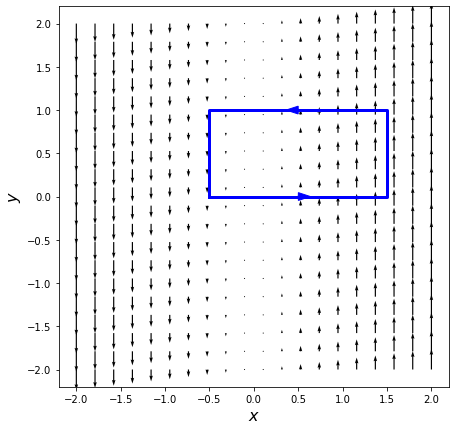

In [38]:
x = y = np.linspace(-2,2,20)
x,y = np.meshgrid(x,y)
plt.figure(figsize=(7,7))
plt.quiver(x,y,0,x);
for c in 'xy':
#         getattr(ax,f"set_{c}lim")([-1,1]);    
    getattr(plt.gca(),f"set_{c}label")(f"${c}$",size=16)
t= np.linspace(0,1,100)    
plt.plot([-1/2,3/2,3/2,-1/2,-1/2],[0,0,1,1,0],'b',lw=3);
plt.arrow(1/2,0,.001,0,color='b',width=.03)
plt.arrow(1/2,1,-.001,0,color='b',width=.03);